## Identify Board Space

https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_corner.html#sphx-glr-auto-examples-features-detection-plot-corner-py

### Detect Edges

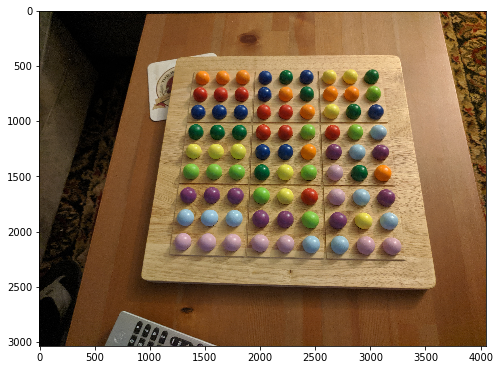

In [3]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as ndi

from skimage import io
from skimage import feature
from skimage.color import rgb2gray

img_paths = [x for x in Path('img').iterdir()]
image = io.imread(str(img_paths[0]))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image);

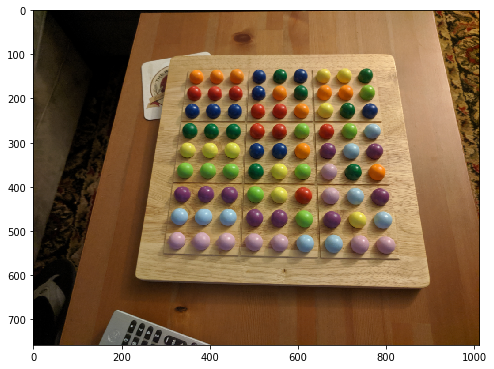

In [4]:
from skimage.transform import resize

image_resized = resize(image, (image.shape[0] / 4, image.shape[1] / 4),
                       anti_aliasing=True)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image_resized);

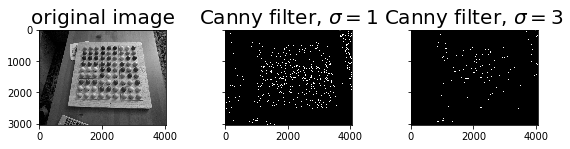

In [5]:
image = rgb2gray(image)

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(image)
edges2 = feature.canny(image, sigma=3)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 8),
                                    sharex=True, sharey=True)

ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('original image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show();

### Identify Corners ... not very good

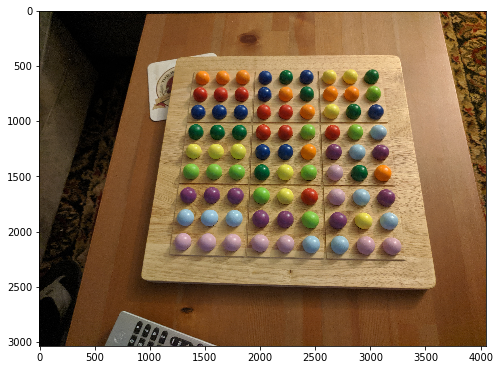

In [66]:
from pathlib import Path

from matplotlib import pyplot as plt

from skimage import io
from skimage.feature import corner_harris, corner_subpix, corner_peaks

img_paths = [x for x in Path('img').iterdir()]
image = io.imread(str(img_paths[0]))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image);

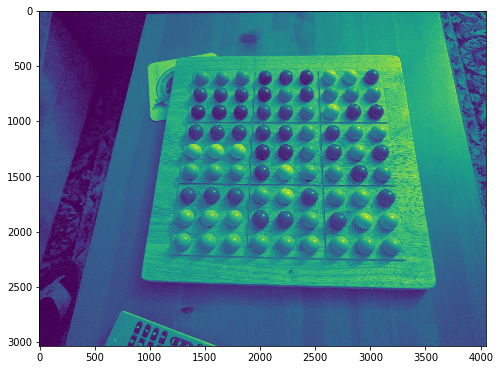

In [69]:
from skimage.color import rgb2gray

image = rgb2gray(image)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image);

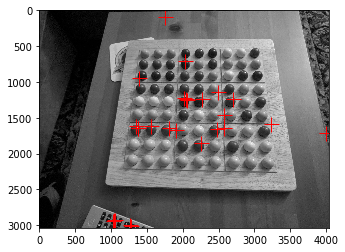

In [72]:
coords = corner_peaks(corner_harris(image), min_distance=5)
coords_subpix = corner_subpix(image, coords, window_size=13)

fig, ax = plt.subplots()
ax.imshow(image, interpolation='nearest', cmap=plt.cm.gray)
# ax.plot(coords[:, 1], coords[:, 0], '.b', markersize=3)
ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
plt.show()

## Rectify Board Space

https://scikit-image.org/docs/stable/auto_examples/applications/plot_geometric.html#sphx-glr-auto-examples-applications-plot-geometric-py

TODO: automate identification of board corners

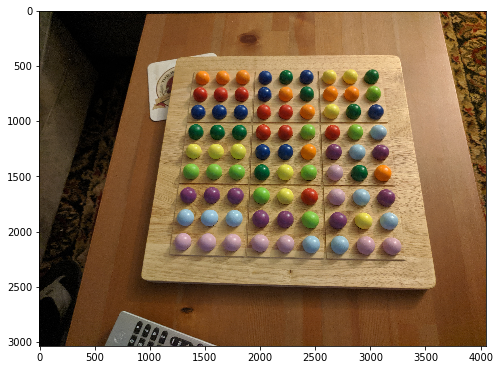

In [57]:
from pathlib import Path

import math
import numpy as np
import matplotlib.pyplot as plt

from skimage import io
from skimage import data
from skimage import transform as tf

img_paths = [x for x in Path('img').iterdir()]
board = io.imread(str(img_paths[0]))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(board);

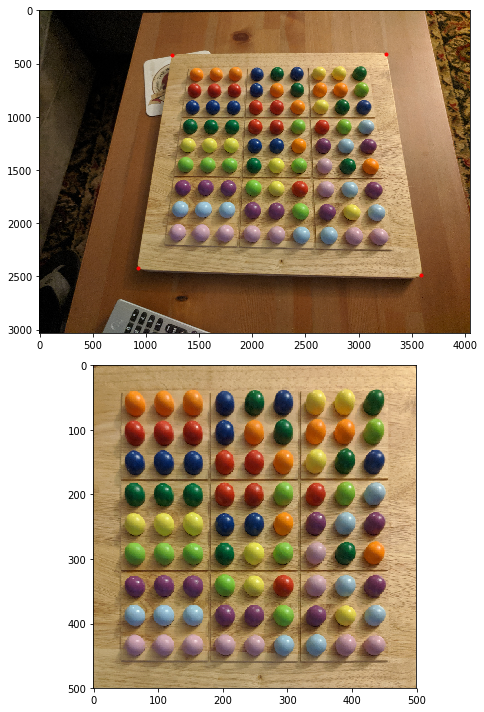

In [58]:
# top left, bottom left, bottom right, top right
src = np.array([[0, 0], [0, 500], [500, 500], [500, 0]])
# TODO: automate the identification of these corners:
dst = np.array([
    [1250,   420], [930,  2420],  # x, y left edge
    [3590,  2490], [3260,  410],   # x, y right edge
])

tform3 = tf.ProjectiveTransform()
tform3.estimate(src, dst)
warped = tf.warp(board, tform3, output_shape=(500, 500))

fig, ax = plt.subplots(nrows=2, figsize=(10, 10))

ax[0].imshow(board, cmap=plt.cm.gray)
ax[0].plot(dst[:, 0], dst[:, 1], '.r')
ax[1].imshow(warped, cmap=plt.cm.gray)

plt.tight_layout()

plt.show()